In [40]:
import numpy as np
from matplotlib import pyplot as plt
import math as math
from scipy.optimize import curve_fit

In [43]:
N=100
a=132
b=4300
def lin(x,a,b):
     return a*x/(x+b)

linear=np.vectorize(logist)

x=100*(np.random.random(N))


noise=0.1
noisy_y=linear(x,a,b) + noise*(np.random.random(N)-0.5)

#noisy_yy=np.vectorize(noisy_y)

error1=0.2
error2=2
y_err=error1*(np.random.random(N))
x_err=error2*(np.random.random(N))



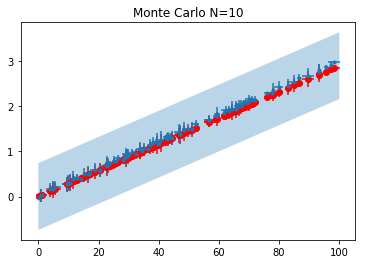

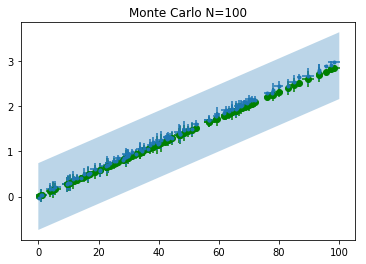

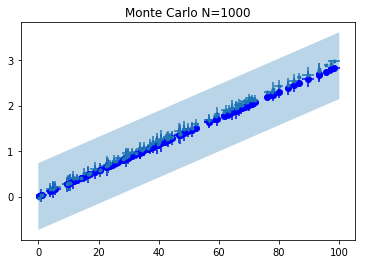

In [44]:

def MonteCarlo(Nm):
    a_array=[]
    b_array=[]
    for i in range(Nm):
        count=i
        mu, sigma = 0, 0.1
        xi=x+(np.random.normal(mu, sigma)-0.5)*2.0*x_err
        yi=noisy_y+(np.random.normal(mu, sigma)-0.5)*2.0*y_err
        popt,pcov=curve_fit(lin,xi,yi)
        a_array.append(popt[0])
        b_array.append(popt[1])
    return a_array, b_array

a1,b1=MonteCarlo(10)
a2,b2=MonteCarlo(100)
a3,b3=MonteCarlo(1000)

am1=np.median(a1)
bm1=np.median(b1)
am2=np.median(a2)
bm2=np.median(b2)
am3=np.median(a3)
bm3=np.median(b3)

x1=np.linspace(0,100,100)
sd1=np.std(linear(x,am1,bm1))
c1=linear(x1,am1,bm1)+sd1
c2=linear(x1,am1,bm1)-sd1

sd2=np.std(linear(x,am2,bm2))
c3=linear(x1,am2,bm2)+sd2
c4=linear(x1,am2,bm2)-sd2

sd3=np.std(linear(x,am3,bm3))
c5=linear(x1,am3,bm3)+sd3
c6=linear(x1,am3,bm3)-sd3



plt.errorbar(x, linear(x,am1,bm1), xerr=x_err, yerr=y_err,  fmt='ro')
plt.fill_between(x1, c1, c2, alpha=0.3)
plt.errorbar(x, noisy_y, xerr=x_err, yerr=y_err, fmt='.')
plt.title("Monte Carlo N=10")
plt.show()
plt.errorbar(x, linear(x,am2,bm2), xerr=x_err, yerr=y_err,  fmt='go')
plt.fill_between(x1, c3, c4, alpha=0.3)
plt.errorbar(x, noisy_y, xerr=x_err, yerr=y_err, fmt='.')
plt.title("Monte Carlo N=100")
plt.show()
plt.errorbar(x, linear(x,am3,bm3), xerr=x_err, yerr=y_err,  fmt='bo')
plt.fill_between(x1, c5, c6, alpha=0.3)
plt.errorbar(x, noisy_y, xerr=x_err, yerr=y_err, fmt='.')
plt.title("Monte Carlo N=1000")
plt.show()